In [40]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [41]:
import pandas as pd
from neuralprophet import NeuralProphet

In [42]:
from prophet import Prophet
import pandas as pd

In [43]:
from prophet import Prophet
import pandas as pd
s=pd.read_excel(r"C:\Users\prernagupta\Desktop\jeans-bf\wrapskirt1.xlsx")
s

,trend_index,trend_name,trend,base,model_created_at,season,ds,y,nsi,fsi_yhat_lower,fsi_yhat,fsi_yhat_upper,fsi_pivot_points,trending_index,newness_index,markdown_index,fashion_leaders_index,oos_index,catwalk_impact
0,379,wrap_skirt_uk_w,Wrap Skirt Uk,Skirts,2022-03-01,S/S 2017,2017-03-20,0.063334,0.075031,0.050137,0.058239,0.065588,"['2020-09-07', '2021-08-30']",1.212795,-0.059219,1.138102,0.512556,0.069396,0.238461
1,379,wrap_skirt_uk_w,Wrap Skirt Uk,Skirts,2022-03-01,S/S 2017,2017-03-27,0.063368,0.074894,0.051985,0.059792,0.068449,"['2020-09-07', '2021-08-30']",1.182851,-0.032019,1.131226,0.503315,0.067908,0.240827
2,379,wrap_skirt_uk_w,Wrap Skirt Uk,Skirts,2022-03-01,S/S 2017,2017-04-03,0.062214,0.074367,0.053710,0.061319,0.069421,"['2020-09-07', '2021-08-30']",1.153782,-0.004574,1.124594,0.494456,0.067228,0.243193
3,379,wrap_skirt_uk_w,Wrap Skirt Uk,Skirts,2022-03-01,S/S 2017,2017-04-10,0.063398,0.073501,0.054482,0.062596,0.071011,"['2020-09-07', '2021-08-30']",1.125590,0.023116,1.118205,0.485979,0.067256,0.245523
4,379,wrap_skirt_uk_w,Wrap Skirt Uk,Skirts,2022-03-01,S/S 2017,2017-04-17,0.063974,0.072349,0.055229,0.063463,0.071989,"['2020-09-07', '2021-08-30']",1.098273,0.051050,1.112060,0.477884,0.067889,0.247418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,379,wrap_skirt_uk_w,Wrap Skirt Uk,Skirts,2022-03-01,S/S 2024,2024-02-12,NaN,NaN,0.149769,0.157967,0.166102,"['2020-09-07', '2021-08-30']",NaN,NaN,NaN,NaN,NaN,NaN
361,379,wrap_skirt_uk_w,Wrap Skirt Uk,Skirts,2022-03-01,S/S 2024,2024-02-19,NaN,NaN,0.148918,0.157565,0.166154,"['2020-09-07', '2021-08-30']",NaN,NaN,NaN,NaN,NaN,NaN
362,379,wrap_skirt_uk_w,Wrap Skirt Uk,Skirts,2022-03-01,S/S 2024,2024-02-26,NaN,NaN,0.149300,0.157495,0.166001,"['2020-09-07', '2021-08-30']",NaN,NaN,NaN,NaN,NaN,NaN
363,379,wrap_skirt_uk_w,Wrap Skirt Uk,Skirts,2022-03-01,S/S 2024,2024-03-04,NaN,NaN,0.149616,0.157875,0.165573,"['2020-09-07', '2021-08-30']",NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
s=s.iloc[:, [6, 7]]
s
s['ds']= pd.to_datetime(s['ds'])
s

WARNING - (py.warnings._showwarnmsg) - <ipython-input-44-60943957d9c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['ds']= pd.to_datetime(s['ds'])

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['ds']= pd.to_datetime(s['ds'])



,ds,y
0,2017-03-20,0.063334
1,2017-03-27,0.063368
2,2017-04-03,0.062214
3,2017-04-10,0.063398
4,2017-04-17,0.063974
...,...,...
360,2024-02-12,NaN
361,2024-02-19,NaN
362,2024-02-26,NaN
363,2024-03-04,NaN


In [45]:
s=s.dropna()

In [26]:
m = NeuralProphet(growth="discontinuous",  # Determine trend types: 'linear', 'discontinuous', 'off'
        changepoints=None, # list of dates that may include change points (None -> automatic )
        n_changepoints=5,
        changepoints_range=1,
        trend_reg=0,
        trend_reg_threshold=False,
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
        seasonality_mode="additive",
        seasonality_reg=0,
        n_forecasts=1,
        n_lags=0,
        num_hidden_layers=0,
        d_hidden=None,     # Dimension of hidden layers of AR-Net
        ar_sparsity=None,  # Sparcity in the AR coefficients
        learning_rate=5,
        loss_func="Huber",
        normalize="auto",  # Type of normalization ('minmax', 'standardize', 'soft', 'off')
        impute_missing=True, epochs=5000)
metrics = m.fit(s, freq="7D")
future = m.make_future_dataframe(s, periods=75, n_historic_predictions=len(s))
forecast = m.predict(future)

INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
Epoch[5000/5000]: 100%|█| 5000/5000 [02:22<00:00, 35.00it/s, SmoothL1Loss=0.0014, MAE=0.00304, RMSE=0.00412, RegLoss=0]


In [27]:
metrics

,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.430541,0.066457,0.080938,0.0
1,0.115369,0.033940,0.039003,0.0
2,0.052008,0.022208,0.026431,0.0
3,0.021130,0.013805,0.016789,0.0
4,0.014114,0.011040,0.013445,0.0
...,...,...,...,...
4995,0.001399,0.003038,0.004177,0.0
4996,0.001399,0.003038,0.004140,0.0
4997,0.001399,0.003039,0.004110,0.0
4998,0.001399,0.003039,0.004194,0.0


Text(0.5, 1.0, 'warp-skirt')

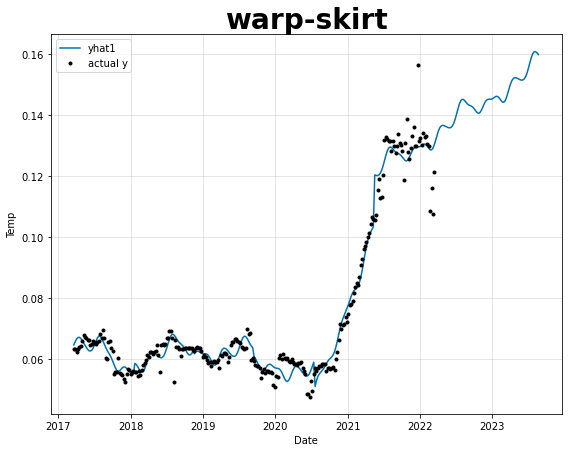

In [28]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
m.plot(forecast, xlabel="Date", ylabel="Temp", ax=ax)
ax.set_title("warp-skirt", fontsize=28, fontweight="bold")

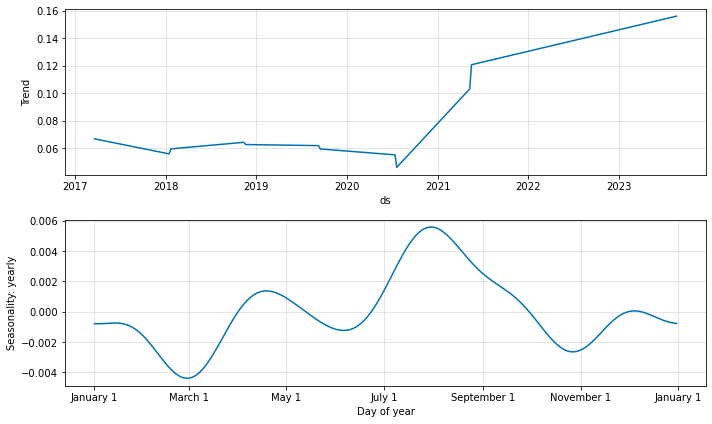

In [29]:
fig_comp = m.plot_components(forecast)

In [30]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
import numpy as np

In [31]:
import numpy as np
forecast

,ds,y,yhat1,residual1,trend,season_yearly
0,2017-03-20,0.063334,0.064615,0.001281,0.066755,-0.002139
1,2017-03-27,0.063368,0.065678,0.002310,0.066500,-0.000821
2,2017-04-03,0.062214,0.066556,0.004343,0.066245,0.000312
3,2017-04-10,0.063398,0.067051,0.003653,0.065990,0.001061
4,2017-04-17,0.063974,0.067096,0.003123,0.065735,0.001361
...,...,...,...,...,...,...
331,2023-07-24,NaN,0.160064,NaN,0.154780,0.005284
332,2023-07-31,NaN,0.160666,NaN,0.155079,0.005587
333,2023-08-07,NaN,0.160696,NaN,0.155379,0.005317
334,2023-08-14,NaN,0.160308,NaN,0.155678,0.004630


In [32]:
forecast1=forecast.dropna()
MAPE(forecast1['y'], forecast1['yhat1'])

4.189389028172484

In [33]:
#Here we do cross-validation to assess prediction performance on a horizon of 365 days, starting with 730 days of training data in the first cutoff and then making predictions every 180 days.
#On this 8 year time series, this corresponds to 11 total forecasts.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


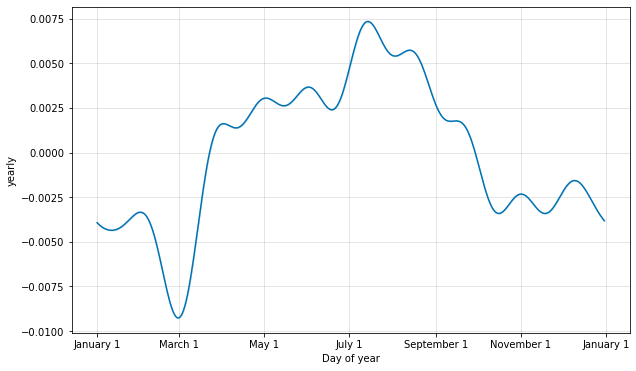

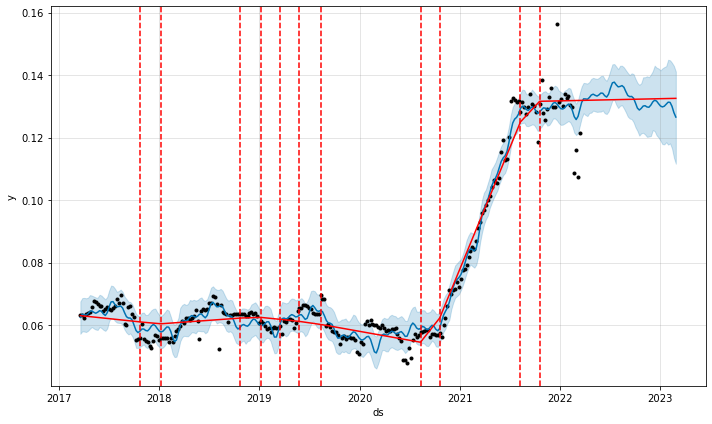

In [34]:
from prophet import Prophet
import pandas as pd
df=s
from prophet.plot import plot_yearly
m = Prophet().fit(df)
a = plot_yearly(m)



from prophet.plot import add_changepoints_to_plot
m = Prophet(changepoint_range=1.0)
# define the model
# fit the model
m.fit(df)
future = m.make_future_dataframe(periods=50, freq='W')

#prop only uses weekly seasonlity, and change points for first 80%
fcst = m.predict(future)
fig = m.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), m, fcst)




In [35]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='1400 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 1 forecasts with cutoffs between 2021-03-14 00:00:00 and 2021-03-14 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

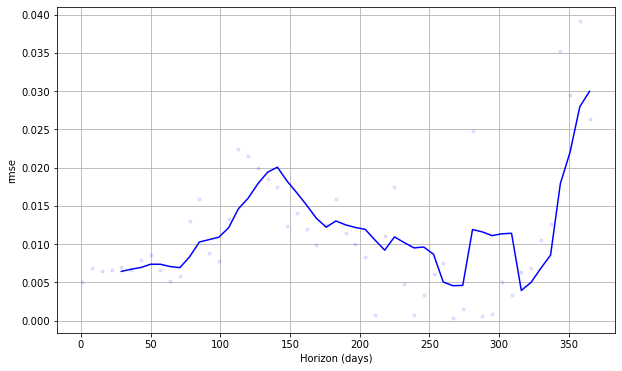

In [36]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [37]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,29 days,0.000042,0.006448,0.006410,0.066092,0.067584,0.068371,0.0
1,36 days,0.000045,0.006731,0.006729,0.068324,0.067584,0.070743,0.0
2,43 days,0.000048,0.006950,0.006932,0.069126,0.067584,0.071608,0.0
3,50 days,0.000054,0.007382,0.007344,0.071783,0.069809,0.074472,0.0
4,57 days,0.000054,0.007381,0.007342,0.070819,0.069809,0.073442,0.0


In [39]:
def eval_neural(df):
    """
    Perform cross validation on our model.
    IMPORTANT: this is correct eval method according to the docs, but differs from Prophet 
               so I built a custom function.
    """

    # setup k fold CV
    METRICS = ['SmoothL1Loss', 'MAE', 'RMSE']

    folds = NeuralProphet().crossvalidation_split_df(df, freq="7D", k=5, fold_pct=0.10, fold_overlap_pct=0.5)

    # return dfs
    metrics_train = pd.DataFrame(columns=METRICS)
    metrics_test = pd.DataFrame(columns=METRICS)

    # CV
    for df_train, df_test in folds:
        m = NeuralProphet(growth="discontinuous",  # Determine trend types: 'linear', 'discontinuous', 'off'
        changepoints=None, # list of dates that may include change points (None -> automatic )
        n_changepoints=5,
        changepoints_range=1,
        trend_reg=0,
        trend_reg_threshold=False,
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
        seasonality_mode="additive",
        seasonality_reg=0,
        n_forecasts=1,
        n_lags=0,
        num_hidden_layers=0,
        d_hidden=None,     # Dimension of hidden layers of AR-Net
        ar_sparsity=None,  # Sparcity in the AR coefficients
        learning_rate=5,
        loss_func="Huber",
        normalize="auto",  # Type of normalization ('minmax', 'standardize', 'soft', 'off')
        impute_missing=True)
        train = m.fit(df=df_train, freq="7D", 
        epochs=1000,
        local_modeling=False,
        progress_bar=True,
        plot_live_loss=False,
        progress_print=True,
        minimal=False)
        test = m.test(df=df_test)
        metrics_train = metrics_train.append(train[METRICS].iloc[-1])
        metrics_test = metrics_test.append(test[METRICS].iloc[-1])
    return ( metrics_test, metrics_train)


In [46]:
df=s

In [47]:
eval_neural(s)

INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO:NP.config:Auto-set batch_size to 16
Epoch[1000/1000]: 100%|██| 1000/1000 [00:23<00:00, 42.78it/s, SmoothL1Loss=0.00988, MAE=0.002, RMSE=0.00263, RegLoss=0]
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE   RMSE
1         0.830  0.025  0.028
INFO:NP.forecaster:Validation metrics:    SmoothL1Loss    MAE   RMSE
1         0.830  0.025  0.028
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO:NP.config:Auto-set batch_size to 16
Epoch[1000/1000]: 100%|█| 1000/1000 [00:22<00:00, 44.83it/s, SmoothL1Loss=0.00851, MAE=0.00199, RMSE=0.00263, RegLoss=0
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE   RMSE
1         0.695  0.024  0.026
INFO:NP.forecaster:Validation metrics:    SmoothL1Loss    MAE   RMSE
1         0.695  0.024  0.026
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO:NP.config:Auto-set batch_size to 16
Epoch

(   SmoothL1Loss       MAE      RMSE
 0      0.829996  0.024676  0.027811
 0      0.694595  0.024155  0.026041
 0      0.636810  0.029981  0.031861
 0      0.030085  0.010576  0.012062
 0      0.027990  0.012425  0.017178,
      SmoothL1Loss       MAE      RMSE
 999      0.009883  0.002005  0.002634
 999      0.008511  0.001993  0.002628
 999      0.007471  0.002511  0.003223
 999      0.002210  0.002455  0.003170
 999      0.001329  0.002808  0.003661)

In [48]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [50]:
sqrt(mean_squared_error(forecast1['y'], forecast1['yhat1']) )

0.004429854086492451